In [1]:
# attach packages and display R and package version information
library(ggplot2)
library(dplyr)
library(Seurat)
library(ggrepel)
library(patchwork)
library(MAST)
sessionInfo()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMin

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.3 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /tscc/nfs/home/ssharvey/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] MAST_1.28.0                 SingleCellExperiment_1.22.0
 [3] SummarizedExperiment_1.30.2 Biobase_2.60.0             
 [5] GenomicRanges_1.52.0        GenomeInfoDb_1.36.1        


In [2]:
#load in astrocytes
astros <- readRDS("~/scratch_2.0_new/fat7_snRNAseq/astrocytes.rds")
astros

An object of class Seurat 
57572 features across 25867 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

In [3]:
head(astros[[]])

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,treatment,genotype,timepoint,group,sample,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,celltype
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1,SeuratProject,5167,2394,0.69672924,LPS,Elovl7 cKO,D1,D1_cKO_LPS,D1_cKO_LPS_1,5251,2393,32,32,astrocyte
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1,SeuratProject,1388,863,0.07204611,LPS,Elovl7 cKO,D1,D1_cKO_LPS,D1_cKO_LPS_1,4235,1315,19,19,astrocyte
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1,SeuratProject,2798,1495,1.25089350,LPS,Elovl7 cKO,D1,D1_cKO_LPS,D1_cKO_LPS_1,4641,1551,49,49,astrocyte
D1_cKO_LPS_1_AAACCCATCGGTTGTA-1,SeuratProject,2873,1429,0.03480682,LPS,Elovl7 cKO,D1,D1_cKO_LPS,D1_cKO_LPS_1,4734,1477,16,16,astrocyte
D1_cKO_LPS_1_AAACCCATCTGTAACG-1,SeuratProject,1953,1025,0.56323605,LPS,Elovl7 cKO,D1,D1_cKO_LPS,D1_cKO_LPS_1,4654,1289,32,32,astrocyte
D1_cKO_LPS_1_AAACGAACATTGCAAC-1,SeuratProject,3746,1636,0.00000000,LPS,Elovl7 cKO,D1,D1_cKO_LPS,D1_cKO_LPS_1,4783,1636,1,1,astrocyte


In [4]:
DefaultAssay(astros) <- "RNA"
astros <- NormalizeData(
  astros,
  assay = NULL,
  normalization.method = "LogNormalize",
  scale.factor = 10000,
  margin = 1,
  verbose = TRUE,
)
astros

Normalizing layer: counts



An object of class Seurat 
57572 features across 25867 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: SCT
 3 dimensional reductions calculated: pca, umap, integrated.dr

In [5]:
#set group as active identity for pairwise comparisons
Idents(astros) <- "group"

In [6]:
#D1 - saline: cKO vs Control
D1.saline.cKOvCtrl <- FindMarkers(astros, ident.1 = "D1_cKO_saline", ident.2 = "D1_control_saline", 
                                  verbose = FALSE, test.use = "MAST", slot = "data")
head(D1.saline.cKOvCtrl)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AY036118,0.000000e+00,1.7377161,0.626,0.273,0.000000e+00
Gm20713,0.000000e+00,1.0320056,0.905,0.781,0.000000e+00
Wdr17,0.000000e+00,1.1070199,0.991,0.958,0.000000e+00
Gm35188,2.681417e-265,0.9422566,0.877,0.724,8.656953e-261
Fgfr2,1.140027e-185,0.6001650,0.960,0.910,3.680577e-181
Gabrb1,4.211163e-106,-0.3368739,0.991,0.993,1.359574e-101


In [7]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.01 and abs(FC) > 20%
D1.saline.cKOvCtrl$DE <- "ns"
D1.saline.cKOvCtrl$DE[D1.saline.cKOvCtrl$avg_log2FC > 0.263 & D1.saline.cKOvCtrl$p_val_adj < 0.01] <- "Up"
D1.saline.cKOvCtrl$DE[D1.saline.cKOvCtrl$avg_log2FC < -0.263 & D1.saline.cKOvCtrl$p_val_adj < 0.01] <- "Down"
D1.saline.cKOvCtrl$logAdjP <- -log10(D1.saline.cKOvCtrl$p_val_adj)
D1.saline.cKOvCtrl$Gene <- rownames(D1.saline.cKOvCtrl)

In [8]:
countDE <- table(D1.saline.cKOvCtrl$DE)
countDE


Down   ns   Up 
 189 7450  438 

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


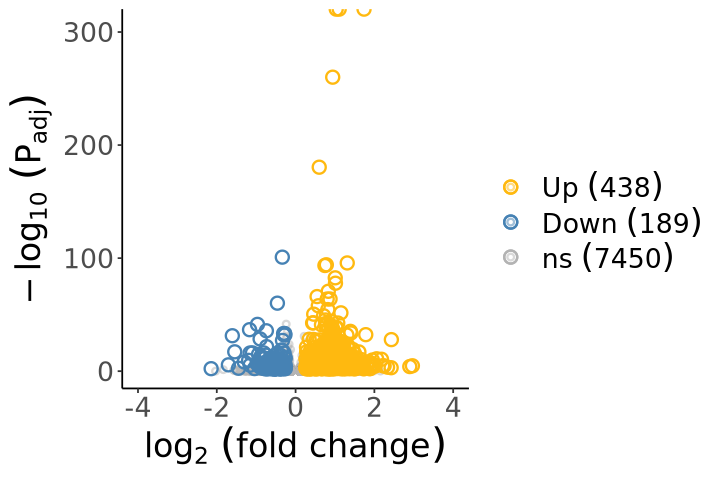

In [9]:
#Volcano Plots
cols <- c("Down" = "steelblue", "ns" = "grey70", "Up" = "darkgoldenrod1")

q <- ggplot(data = subset(D1.saline.cKOvCtrl), aes(x = avg_log2FC, y = logAdjP, col = DE, label = Gene)) + 
    geom_point(data = subset(D1.saline.cKOvCtrl, DE == "ns"), alpha = 0.5, shape = 21, size = 1.2, stroke = 1) +
    geom_point(data = subset(D1.saline.cKOvCtrl, DE == "Down"), alpha = 1, shape = 21, size = 3, stroke = 1) +
    geom_point(data = subset(D1.saline.cKOvCtrl, DE == "Up"), alpha = 1, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +
    #geom_text_repel(data = subset(saline.cKOvCtrl, gene %in% genes.of.interest), size = 4.5, 
     #               box.padding = 0.5, color = "black", fontface = "italic", max.overlaps  = Inf) +    
    xlab(bquote(log[2]~("fold change"))) +
    ylab(bquote(-log[10]~(P[adj]))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE[3]))), bquote("Down"~(.(countDE[1]))), bquote("ns"~(.(countDE[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5)) +
    xlim(-4, 4)+
    ylim(0,305)
options(repr.plot.width = 6, repr.plot.height = 4)
q

In [10]:
#Export figures
pdf("./DE_analysis_240905/figures/D1.saline.cKOvsCtrl_volcano.pdf",
   width = 6,
   height = 4)

options(repr.plot.width = 6, repr.plot.height = 4)
q

dev.off()

png 
  2

In [11]:
#D1 - LPS: cKO vs Control
D1.LPS.cKOvCtrl <- FindMarkers(astros, ident.1 = "D1_cKO_LPS", ident.2 = "D1_control_LPS", 
                                  verbose = FALSE, test.use = "MAST", slot = "data")
head(D1.LPS.cKOvCtrl)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AY036118,3.798130e-316,1.0478013,0.932,0.840,1.226226e-311
Gm42418,1.433333e-302,0.9382925,0.988,0.940,4.627517e-298
Apoe,4.718918e-145,1.0134783,0.812,0.703,1.523503e-140
Zfhx3,1.022384e-118,-1.5443049,0.193,0.409,3.300766e-114
Cmss1,5.873236e-115,0.9593677,0.553,0.414,1.896174e-110
Malat1,9.465537e-93,0.1676671,1.000,1.000,3.055949e-88


In [12]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.0001
D1.LPS.cKOvCtrl$DE <- "ns"
D1.LPS.cKOvCtrl$DE[D1.LPS.cKOvCtrl$avg_log2FC > 0.263 & D1.LPS.cKOvCtrl$p_val_adj < 0.01] <- "Up"
D1.LPS.cKOvCtrl$DE[D1.LPS.cKOvCtrl$avg_log2FC < -0.263 & D1.LPS.cKOvCtrl$p_val_adj < 0.01] <- "Down"
D1.LPS.cKOvCtrl$logAdjP <- -log10(D1.LPS.cKOvCtrl$p_val_adj)
D1.LPS.cKOvCtrl$Gene <- rownames(D1.LPS.cKOvCtrl)

In [13]:
countDE <- table(D1.LPS.cKOvCtrl$DE)
countDE


Down   ns   Up 
 526 7639  301 

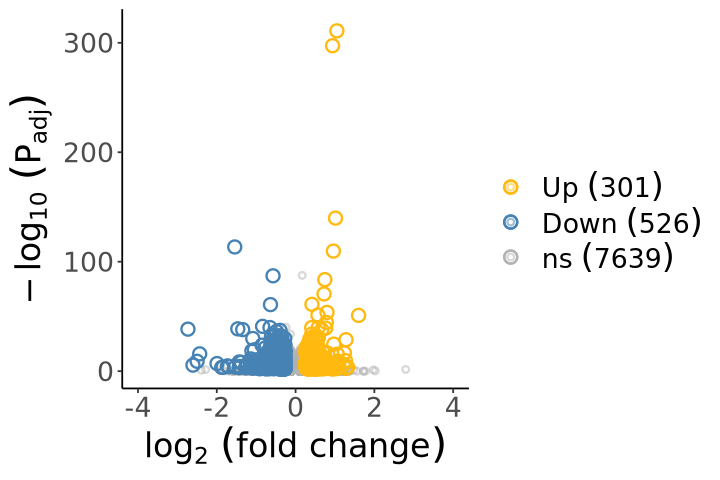

In [14]:
#Volcano Plots
cols <- c("Down" = "steelblue", "ns" = "grey70", "Up" = "darkgoldenrod1")

q <- ggplot(data = subset(D1.LPS.cKOvCtrl), aes(x = avg_log2FC, y = logAdjP, col = DE, label = Gene)) + 
    geom_point(data = subset(D1.LPS.cKOvCtrl, DE == "ns"), alpha = 0.5, shape = 21, size = 1.2, stroke = 1) +
    geom_point(data = subset(D1.LPS.cKOvCtrl, DE == "Down"), alpha = 1, shape = 21, size = 3, stroke = 1) +
    geom_point(data = subset(D1.LPS.cKOvCtrl, DE == "Up"), alpha = 1, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +
    #geom_text_repel(data = subset(saline.cKOvCtrl, gene %in% genes.of.interest), size = 4.5, 
     #               box.padding = 0.5, color = "black", fontface = "italic", max.overlaps  = Inf) +    
    xlab(bquote(log[2]~("fold change"))) +
    ylab(bquote(-log[10]~(P[adj]))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE[3]))), bquote("Down"~(.(countDE[1]))), bquote("ns"~(.(countDE[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5)) +
    xlim(-4, 4)+
    ylim(0,315)
options(repr.plot.width = 6, repr.plot.height = 4)
q

In [15]:
#Export figures
pdf("./DE_analysis_240905/figures/D1.LPS.cKOvsCtrl_volcano.pdf",
   width = 6,
   height = 4)

options(repr.plot.width = 6, repr.plot.height = 4)
q

dev.off()

png 
  2

In [16]:
#D1 - LPS vs Saline
D1.LPSvsSaline <- FindMarkers(astros, ident.1 = "D1_control_LPS", ident.2 = "D1_control_saline", 
                                  verbose = FALSE, test.use = "MAST", slot = "data")
head(D1.LPSvsSaline)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AY036118,0,2.8680061,0.840,0.273,0
Gm42418,0,2.4961131,0.940,0.560,0
Gfap,0,2.3145797,0.438,0.099,0
Sorbs1,0,1.5432515,0.871,0.587,0
Tspan7,0,-0.9484414,0.814,0.924,0
Mertk,0,-0.9776820,0.832,0.937,0


In [17]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.0001
D1.LPSvsSaline$DE <- "ns"
D1.LPSvsSaline$DE[D1.LPSvsSaline$avg_log2FC > 0.263 & D1.LPSvsSaline$p_val_adj < 0.01] <- "Up"
D1.LPSvsSaline$DE[D1.LPSvsSaline$avg_log2FC < -0.263 & D1.LPSvsSaline$p_val_adj < 0.01] <- "Down"
D1.LPSvsSaline$logAdjP <- -log10(D1.LPSvsSaline$p_val_adj)
D1.LPSvsSaline$Gene <- rownames(D1.LPSvsSaline)

In [18]:
countDE <- table(D1.LPSvsSaline$DE)
countDE


Down   ns   Up 
 462 7858 1676 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


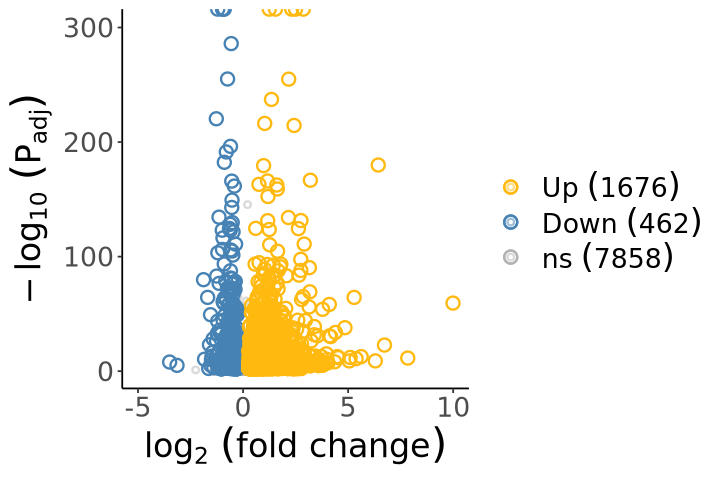

In [19]:
#Volcano Plots
cols <- c("Down" = "steelblue", "ns" = "grey70", "Up" = "darkgoldenrod1")

q <- ggplot(data = subset(D1.LPSvsSaline), aes(x = avg_log2FC, y = logAdjP, col = DE, label = Gene)) + 
    geom_point(data = subset(D1.LPSvsSaline, DE == "ns"), alpha = 0.5, shape = 21, size = 1.2, stroke = 1) +
    geom_point(data = subset(D1.LPSvsSaline, DE == "Down"), alpha = 1, shape = 21, size = 3, stroke = 1) +
    geom_point(data = subset(D1.LPSvsSaline, DE == "Up"), alpha = 1, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +
    #geom_text_repel(data = subset(saline.cKOvCtrl, gene %in% genes.of.interest), size = 4.5, 
     #               box.padding = 0.5, color = "black", fontface = "italic", max.overlaps  = Inf) +    
    xlab(bquote(log[2]~("fold change"))) +
    ylab(bquote(-log[10]~(P[adj]))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE[3]))), bquote("Down"~(.(countDE[1]))), bquote("ns"~(.(countDE[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5)) +
    xlim(-5, 10)+
    ylim(0,301)
options(repr.plot.width = 6, repr.plot.height = 4)
q

In [20]:
#Export figures
pdf("./DE_analysis_240905/figures/D1.LPSvsSaline_volcano.pdf",
   width = 6,
   height = 4)

options(repr.plot.width = 6, repr.plot.height = 4)
q

dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


png 
  2

In [21]:
#D6 - saline: cKO vs Control
D6.saline.cKOvCtrl <- FindMarkers(astros, ident.1 = "D6_cKO_saline", ident.2 = "D6_control_saline", 
                                  verbose = FALSE, test.use = "MAST", slot = "data")
head(D6.saline.cKOvCtrl)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gm42418,2.341858e-36,0.5624078,0.906,0.799,7.560688e-32
Msmo1,7.927373e-31,0.7248506,0.559,0.374,2.559352e-26
AY036118,3.772381e-30,0.4353087,0.801,0.631,1.217913e-25
Hmgcs1,6.831421e-30,0.9605860,0.419,0.246,2.205524e-25
Aacs,7.941316e-26,1.3275245,0.202,0.081,2.563854e-21
Zbtb16,1.987059e-24,0.7029986,0.577,0.438,6.415221e-20


In [22]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.0001
D6.saline.cKOvCtrl$DE <- "ns"
D6.saline.cKOvCtrl$DE[D6.saline.cKOvCtrl$avg_log2FC > 0.263 & D6.saline.cKOvCtrl$p_val_adj < 0.01] <- "Up"
D6.saline.cKOvCtrl$DE[D6.saline.cKOvCtrl$avg_log2FC < -0.263 & D6.saline.cKOvCtrl$p_val_adj < 0.01] <- "Down"
D6.saline.cKOvCtrl$logAdjP <- -log10(D6.saline.cKOvCtrl$p_val_adj)
D6.saline.cKOvCtrl$Gene <- rownames(D6.saline.cKOvCtrl)

In [23]:
countDE <- table(D6.saline.cKOvCtrl$DE)
countDE


Down   ns   Up 
  39 8495  219 

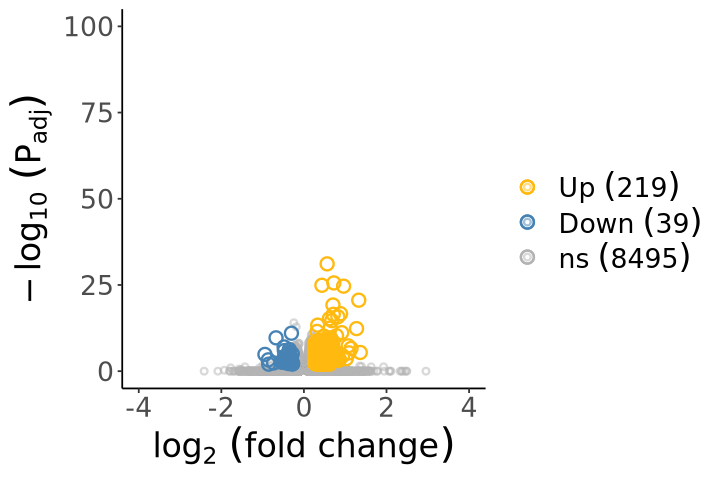

In [24]:
#Volcano Plots
cols <- c("Down" = "steelblue", "ns" = "grey70", "Up" = "darkgoldenrod1")

q <- ggplot(data = subset(D6.saline.cKOvCtrl), aes(x = avg_log2FC, y = logAdjP, col = DE, label = Gene)) + 
    geom_point(data = subset(D6.saline.cKOvCtrl, DE == "ns"), alpha = 0.5, shape = 21, size = 1.2, stroke = 1) +
    geom_point(data = subset(D6.saline.cKOvCtrl, DE == "Down"), alpha = 1, shape = 21, size = 3, stroke = 1) +
    geom_point(data = subset(D6.saline.cKOvCtrl, DE == "Up"), alpha = 1, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +
    #geom_text_repel(data = subset(saline.cKOvCtrl, gene %in% genes.of.interest), size = 4.5, 
     #               box.padding = 0.5, color = "black", fontface = "italic", max.overlaps  = Inf) +    
    xlab(bquote(log[2]~("fold change"))) +
    ylab(bquote(-log[10]~(P[adj]))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE[3]))), bquote("Down"~(.(countDE[1]))), bquote("ns"~(.(countDE[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5)) +
    xlim(-4, 4)+
    ylim(0,100)
options(repr.plot.width = 6, repr.plot.height = 4)
q

In [25]:
#Export figures
pdf("./DE_analysis_240905/figures/D6.saline.cKOvsCtrl_volcano.pdf",
   width = 6,
   height = 4)

options(repr.plot.width = 6, repr.plot.height = 4)
q

dev.off()

png 
  2

In [26]:
#D6 - LPS: cKO vs Control
D6.LPS.cKOvCtrl <- FindMarkers(astros, ident.1 = "D6_cKO_LPS", ident.2 = "D6_control_LPS", 
                                  verbose = FALSE, test.use = "MAST", slot = "data")
head(D6.LPS.cKOvCtrl)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zfp207,1.534108e-123,0.1903174,0.573,0.331,4.952867e-119
Kif1a,1.456250e-116,0.2914624,0.564,0.314,4.701503e-112
Akap8l,7.331943e-116,0.1308056,0.492,0.284,2.367118e-111
Cpne1,9.314226e-116,0.3011160,0.469,0.244,3.007098e-111
Ranbp2,6.058916e-113,0.1103269,0.474,0.275,1.956121e-108
Fubp1,1.758101e-112,0.1363127,0.598,0.372,5.676029e-108


In [27]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.0001
D6.LPS.cKOvCtrl$DE <- "ns"
D6.LPS.cKOvCtrl$DE[D6.LPS.cKOvCtrl$avg_log2FC > 0.263 & D6.LPS.cKOvCtrl$p_val_adj < 0.01] <- "Up"
D6.LPS.cKOvCtrl$DE[D6.LPS.cKOvCtrl$avg_log2FC < -0.263 & D6.LPS.cKOvCtrl$p_val_adj < 0.01] <- "Down"
D6.LPS.cKOvCtrl$logAdjP <- -log10(D6.LPS.cKOvCtrl$p_val_adj)
D6.LPS.cKOvCtrl$Gene <- rownames(D6.LPS.cKOvCtrl)

In [36]:
countDE <- table(D6.LPS.cKOvCtrl$DE)
countDE


Down   ns   Up 
1103 6547 1819 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


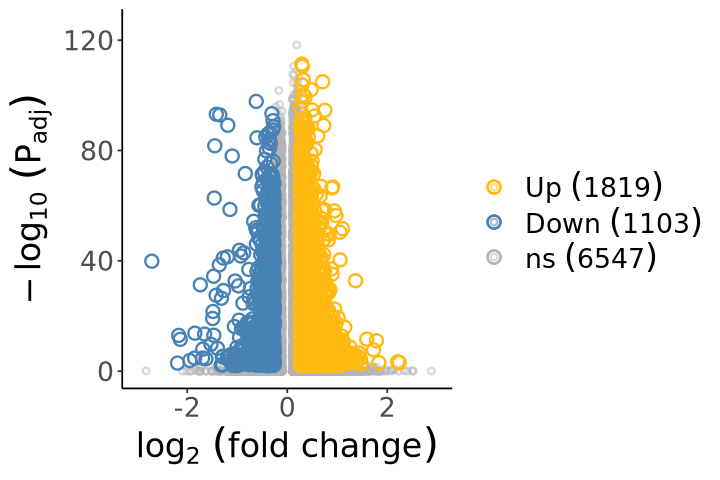

In [39]:
#Volcano Plots
cols <- c("Down" = "steelblue", "ns" = "grey70", "Up" = "darkgoldenrod1")

q <- ggplot(data = subset(D6.LPS.cKOvCtrl), aes(x = avg_log2FC, y = logAdjP, col = DE, label = Gene)) + 
    geom_point(data = subset(D6.LPS.cKOvCtrl, DE == "ns"), alpha = 0.5, shape = 21, size = 1.2, stroke = 1) +
    geom_point(data = subset(D6.LPS.cKOvCtrl, DE == "Down"), alpha = 1, shape = 21, size = 3, stroke = 1) +
    geom_point(data = subset(D6.LPS.cKOvCtrl, DE == "Up"), alpha = 1, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +
    #geom_text_repel(data = subset(saline.cKOvCtrl, gene %in% genes.of.interest), size = 4.5, 
     #               box.padding = 0.5, color = "black", fontface = "italic", max.overlaps  = Inf) +    
    xlab(bquote(log[2]~("fold change"))) +
    ylab(bquote(-log[10]~(P[adj]))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE[3]))), bquote("Down"~(.(countDE[1]))), bquote("ns"~(.(countDE[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5)) +
    xlim(-3, 3)+
    ylim(0,125)
options(repr.plot.width = 6, repr.plot.height = 4)
q

In [40]:
#Export figures
pdf("./DE_analysis_240905/figures/D6.LPS.cKOvsCtrl_volcano.pdf",
   width = 6,
   height = 4)

options(repr.plot.width = 6, repr.plot.height = 4)
q

dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


png 
  2

In [31]:
#D6 - LPS vs Saline
D6.LPSvsSaline <- FindMarkers(astros, ident.1 = "D6_control_LPS", ident.2 = "D6_control_saline", 
                                  verbose = FALSE, test.use = "MAST", slot = "data")
head(D6.LPS.cKOvCtrl)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,DE,logAdjP,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Zfp207,1.534108e-123,0.1903174,0.573,0.331,4.952867e-119,ns,118.3051,Zfp207
Kif1a,1.456250e-116,0.2914624,0.564,0.314,4.701503e-112,Up,111.3278,Kif1a
Akap8l,7.331943e-116,0.1308056,0.492,0.284,2.367118e-111,ns,110.6258,Akap8l
Cpne1,9.314226e-116,0.3011160,0.469,0.244,3.007098e-111,Up,110.5219,Cpne1
Ranbp2,6.058916e-113,0.1103269,0.474,0.275,1.956121e-108,ns,107.7086,Ranbp2
Fubp1,1.758101e-112,0.1363127,0.598,0.372,5.676029e-108,ns,107.2460,Fubp1


In [32]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.0001
D6.LPSvsSaline$DE <- "ns"
D6.LPSvsSaline$DE[D6.LPSvsSaline$avg_log2FC > 0.263 & D6.LPSvsSaline$p_val_adj < 0.01] <- "Up"
D6.LPSvsSaline$DE[D6.LPSvsSaline$avg_log2FC < -0.263 & D6.LPSvsSaline$p_val_adj < 0.01] <- "Down"
D6.LPSvsSaline$logAdjP <- -log10(D6.LPSvsSaline$p_val_adj)
D6.LPSvsSaline$Gene <- rownames(D6.LPSvsSaline)

In [33]:
countDE <- table(D6.LPSvsSaline$DE)
countDE


Down   ns   Up 
 331 8258  742 

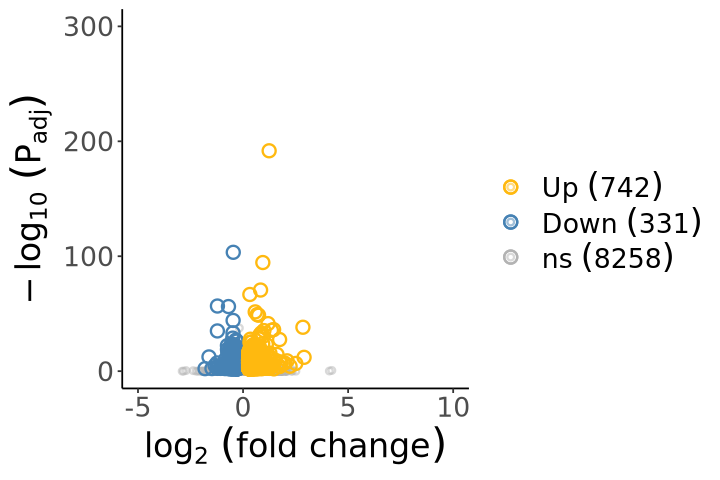

In [34]:
#Volcano Plots
cols <- c("Down" = "steelblue", "ns" = "grey70", "Up" = "darkgoldenrod1")

q <- ggplot(data = subset(D6.LPSvsSaline), aes(x = avg_log2FC, y = logAdjP, col = DE, label = Gene)) + 
    geom_point(data = subset(D6.LPSvsSaline, DE == "ns"), alpha = 0.5, shape = 21, size = 1.2, stroke = 1) +
    geom_point(data = subset(D6.LPSvsSaline, DE == "Down"), alpha = 1, shape = 21, size = 3, stroke = 1) +
    geom_point(data = subset(D6.LPSvsSaline, DE == "Up"), alpha = 1, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +
    #geom_text_repel(data = subset(saline.cKOvCtrl, gene %in% genes.of.interest), size = 4.5, 
     #               box.padding = 0.5, color = "black", fontface = "italic", max.overlaps  = Inf) +    
    xlab(bquote(log[2]~("fold change"))) +
    ylab(bquote(-log[10]~(P[adj]))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE[3]))), bquote("Down"~(.(countDE[1]))), bquote("ns"~(.(countDE[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5)) +
    xlim(-5, 10)+
    ylim(0,300)
options(repr.plot.width = 6, repr.plot.height = 4)
q

In [35]:
#Export figures
pdf("./DE_analysis_240905/figures/D6.LPSvsSaline_volcano.pdf",
   width = 6,
   height = 4)

options(repr.plot.width = 6, repr.plot.height = 4)
q

dev.off()

png 
  2

In [41]:
#export all differential expression comparison tables
write.csv(D1.saline.cKOvCtrl, "./DE_analysis_240905/D1_saline_cKOvsControl.csv")
write.csv(D1.LPS.cKOvCtrl, "./DE_analysis_240905/D1_LPS_cKOvsControl.csv")
write.csv(D1.LPSvsSaline, "./DE_analysis_240905/D1_LPSvsSaline.csv")
write.csv(D6.saline.cKOvCtrl, "./DE_analysis_240905/D6_saline_cKOvsControl.csv")
write.csv(D6.LPS.cKOvCtrl, "./DE_analysis_240905/D6_LPS_cKOvsControl.csv")
write.csv(D6.LPSvsSaline, "./DE_analysis_240905/D6_LPSvsSaline.csv")